In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from common import *
from gaussian_example import data
import yaml
import json
from PIL import Image
import skimage.transform

In [27]:
with open('templates.yml') as f:
    templates = yaml.load(f)

In [92]:
df = data
fig = go.FigureWidget(
    data=[
        dict(
            x=df.x_pred,
            y=df.y_pred,
        ),
        dict(
            x=df.x_pred,
            y=df.y_pred+df.sigmas),
        dict(    
            x=df.x_pred,
            y=df.y_pred-df.sigmas)
    ],
)
fig.layout.template.update(templates['continuous_error_bars'])
fig.layout.template.update(templates['dark_layout'])
fig

ValueError: Invalid properties specified for object of type plotly.graph_objs.layout.Template: ('annotationdefaults', 'colorscale', 'colorway', 'font', 'geo', 'mapbox', 'paper_bgcolor', 'plot_bgcolor', 'polar', 'scene', 'shapedefaults', 'sliderdefaults', 'ternary', 'title', 'updatemenudefaults', 'xaxis', 'yaxis')

    Valid properties:
        data
            plotly.graph_objs.layout.template.Data instance or dict
            with compatible properties
        layout
            plotly.graph_objs.layout.template.Layout instance or
            dict with compatible properties
        

In [69]:
#from heatmap_ex import mult
im = Image.open('test.png')
#im.shape
#hetmap = skimage.transform.resize(mult, im.shape)

In [39]:
mult = np.array([[0.0612, 0.0969, 0.1549, 0.1833, 0.1668, 0.0963, 0.0586],
        [0.1214, 0.2129, 0.2762, 0.3062, 0.2586, 0.1988, 0.0937],
        [0.1230, 0.2412, 0.3178, 0.3697, 0.3063, 0.2333, 0.1072],
        [0.0937, 0.2000, 0.2951, 0.3496, 0.2890, 0.2022, 0.0891],
        [0.0181, 0.1168, 0.2188, 0.2606, 0.2062, 0.1430, 0.0514],
        [0.0000, 0.0369, 0.1547, 0.1997, 0.1604, 0.0685, 0.0071],
        [0.0000, 0.0000, 0.0381, 0.0730, 0.0539, 0.0103, 0.0000]])
heatmap = skimage.transform.resize(mult, im.shape)

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.



In [90]:
fig = go.FigureWidget(data=[
    go.Contour(
        z=mult,
        opacity=0.35
    )
],layout=dict(
        xaxis=dict(range=[0,6]),
        yaxis=dict(range=[6,0]),
    width=500,
    height=500,
    images=[
      dict(
          source=im,
        sizex=7,
        sizey=7,
        templateitemname='background',
      )
    ],
    template=images_template)
                     )
#hm = fig.add_contour(z=heatmap)

In [91]:
fig

FigureWidget({
    'data': [{'opacity': 0.35,
              'type': 'contour',
              'uid': '3872eaf1-…

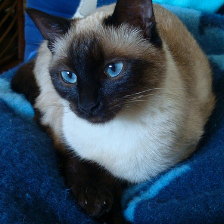

In [77]:
im